In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

In [9]:
df_train = pd.read_csv('/content/sample_data/train.csv')
df_test = pd.read_csv('/content/sample_data/test.csv')

In [10]:
def change_datasets(df):
  df['screen_size'] = df['px_width']*df['px_height']
  df['processor_power'] = df['clock_speed']*df['n_cores']
  df['mobile_features_score'] = df['blue']+ df['four_g'] + df['dual_sim'] + df['wifi'] + df['touch_screen']+ df['three_g']
  df['sc_size_cm'] = df['sc_w']*df['sc_h']
  df.drop(['px_height', 'px_width', 'sc_h', 'sc_w'], axis=1, inplace=True)
  return df

In [ ]:
df_train.head()

In [ ]:
df_train.info()

In [ ]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

ram and target column has a great correlation.
pc and fc has strong correlation(cameras often have the same characteristics).
also 3g and 4g has a good correlation maybe it's cause mobile phones with 4g also has 3g obviously.





more interesting features are sc_h and sc_w/px_height and px_weight cause both describe almost the same characteristic of phone. pixels can be converted to cm and via versa, so maybe  they should be deleted(sc or px one of them)


In [11]:
df_train['sc_h_to_px'] = df_train['sc_h']*96*2.54

In [12]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_h_to_px
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723,-0.029959
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573,-0.002952
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606,-0.029078
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444,-0.011949
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998,-0.011014
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772,0.027166
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435,0.037771
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853,-0.025348
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302,-0.033855
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399,-0.000315


In [13]:
df_train.drop(['sc_h_to_px'], axis=1, inplace=True)

In [14]:
def plot_destribution(data, n_rows, n_cols):

  fig, axs = plt.subplots(n_rows, n_cols)
  axs = axs.flatten()
  for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
  plt.tight_layout()
  plt.show()


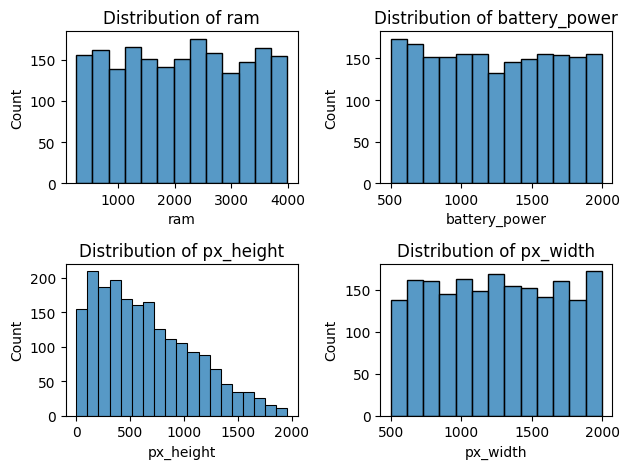

In [15]:
plot_destribution(df_train[['ram', 'battery_power', 'px_height', 'px_width']], 2, 2)


**Feature Engineering**

In [16]:
df_train['screen_size'] = df_train['px_width']*df_train['px_height']
df_train['processor_power'] = df_train['clock_speed']*df_train['n_cores']
df_train['mobile_features_score'] = df_train['blue']+ df_train['four_g'] + df_train['dual_sim'] + df_train['wifi'] + df_train['touch_screen'] + df_train['three_g']
df_train['sc_size_cm'] = df_train['sc_w']*df_train['sc_h']

In [17]:
df_train['mobile_features_score']

,mobile_features_score
0,1
1,5
2,5
3,2
4,4
...,...
1995,5
1996,5
1997,4
1998,4


In [18]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_size,processor_power,mobile_features_score,sc_size_cm
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723,0.018442,-0.015839,-0.009202,-0.024589
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573,-0.015513,0.028519,0.388044,-0.005565
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606,-0.009854,0.675996,-0.025801,-0.006103
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444,-0.017730,-0.020182,0.396059,-0.015703
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998,-0.012337,-0.008472,-0.013543,-0.011437
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772,-0.009064,-0.041211,0.580651,0.037167
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435,0.015263,-0.031757,0.002377,0.022887
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853,0.025138,-0.019518,-0.023483,-0.021453
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302,-0.006036,-0.004082,-0.018254,-0.026375
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399,0.001245,0.647639,-0.006494,0.021618


In [19]:
df_train.drop(['px_height', 'px_width'], axis=1, inplace=True)

In [20]:
df_train.drop(['sc_h', 'sc_w'], axis=1, inplace=True)

In [21]:
target = df_train['price_range']
X = df_train.drop(['price_range'], axis=1)

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
test_data = change_datasets(df_test)

In [28]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,ram,talk_time,three_g,touch_screen,wifi,screen_size,processor_power,mobile_features_score,sc_size_cm
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,3476,2,0,1,0,319112,5.4,3,84
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,3895,7,1,0,0,639322,2.5,4,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,2396,10,0,1,1,1734820,8.4,3,170
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,3893,7,1,1,0,516840,4.0,4,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,1773,7,1,0,1,606690,8.4,3,120


In [29]:
X_scaled.shape, test_data.shape

((2000, 20), (1000, 21))

In [31]:
X.columns==test_data.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [30]:
test_data.drop(['id'], inplace=True, axis=1)

In [ ]:
X_scaled.shape, test_data.shape

((2000, 19), (1000, 20))

In [32]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'screen_size', 'processor_power',
       'mobile_features_score', 'sc_size_cm'],
      dtype='object')

In [33]:
test_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'screen_size', 'processor_power',
       'mobile_features_score', 'sc_size_cm'],
      dtype='object')

In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   battery_power          1000 non-null   int64  
 1   blue                   1000 non-null   int64  
 2   clock_speed            1000 non-null   float64
 3   dual_sim               1000 non-null   int64  
 4   fc                     1000 non-null   int64  
 5   four_g                 1000 non-null   int64  
 6   int_memory             1000 non-null   int64  
 7   m_dep                  1000 non-null   float64
 8   mobile_wt              1000 non-null   int64  
 9   n_cores                1000 non-null   int64  
 10  pc                     1000 non-null   int64  
 11  ram                    1000 non-null   int64  
 12  talk_time              1000 non-null   int64  
 13  three_g                1000 non-null   int64  
 14  touch_screen           1000 non-null   int64  
 15  wifi 

In [36]:
X_scaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -0.45823592,
        -1.76366217, -0.22468605],
       [-0.49513857,  1.0100505 , -1.2530642 , ..., -0.99610417,
         1.30691397, -0.38092598],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ..., -0.81063236,
         1.30691397, -0.75850582],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.06108514,
         0.53926993, -0.92776575],
       [ 0.62252745, -0.9900495 , -0.76274805, ..., -0.43968874,
         0.53926993,  1.29865332],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.95134982,
         2.074558  , -0.05542612]])

In [37]:
test_data_scaled = scaler.transform(test_data)

In [38]:
test_data_scaled

array([[-0.44505984,  1.0100505 ,  0.34046327, ..., -0.27276411,
        -0.2283741 ,  0.04873384],
       [-0.90487356,  1.0100505 , -1.2530642 , ..., -0.81063236,
         0.53926993, -1.04494571],
       [ 1.29403758,  1.0100505 ,  1.56625363, ...,  0.28365131,
        -0.2283741 ,  1.16845337],
       ...,
       [-0.12182446, -0.9900495 , -0.14985287, ..., -1.01465135,
        -0.99601813, -1.04494571],
       [ 0.67032987,  1.0100505 , -1.2530642 , ..., -1.08884007,
        -0.2283741 ,  1.1033534 ],
       [ 0.07166151,  1.0100505 , -1.2530642 , ..., -0.71789645,
         0.53926993, -0.8105858 ]])

In [77]:
X_train, X_test1, y_train, y_test1 = train_test_split(X_scaled, target, test_size=0.3, random_state=42)



In [40]:
clf = RandomForestClassifier()
params = {'n_estimators' : range(50,300), 'criterion' : ['gini', 'entropy'], 'max_depth' : range(2,50), 'min_samples_leaf' : range(10, 50)}

In [41]:
 random_search = RandomizedSearchCV(clf, params, cv=5)


In [42]:
random_search.fit(X_train, y_train)

print(f'best params of model: {random_search.best_params_}')

best params of model: {'n_estimators': 89, 'min_samples_leaf': 13, 'max_depth': 31, 'criterion': 'entropy'}


In [43]:
best_clf = random_search.best_estimator_
y_pred = best_clf.predict(X_test1)

print(f'validation dataset  acc : {accuracy_score(y_pred, y_test1)}')

validation dataset  acc : 0.85


In [44]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

In [45]:
y_pred_val = best_clf.predict(X_valid)
print(f'validation dataset  acc : {accuracy_score(y_pred_val, y_valid)}')

validation dataset  acc : 0.8333333333333334


In [46]:
print(classification_report(y_pred, y_test1))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       156
           1       0.79      0.79      0.79       146
           2       0.74      0.78      0.76       139
           3       0.92      0.89      0.90       159

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



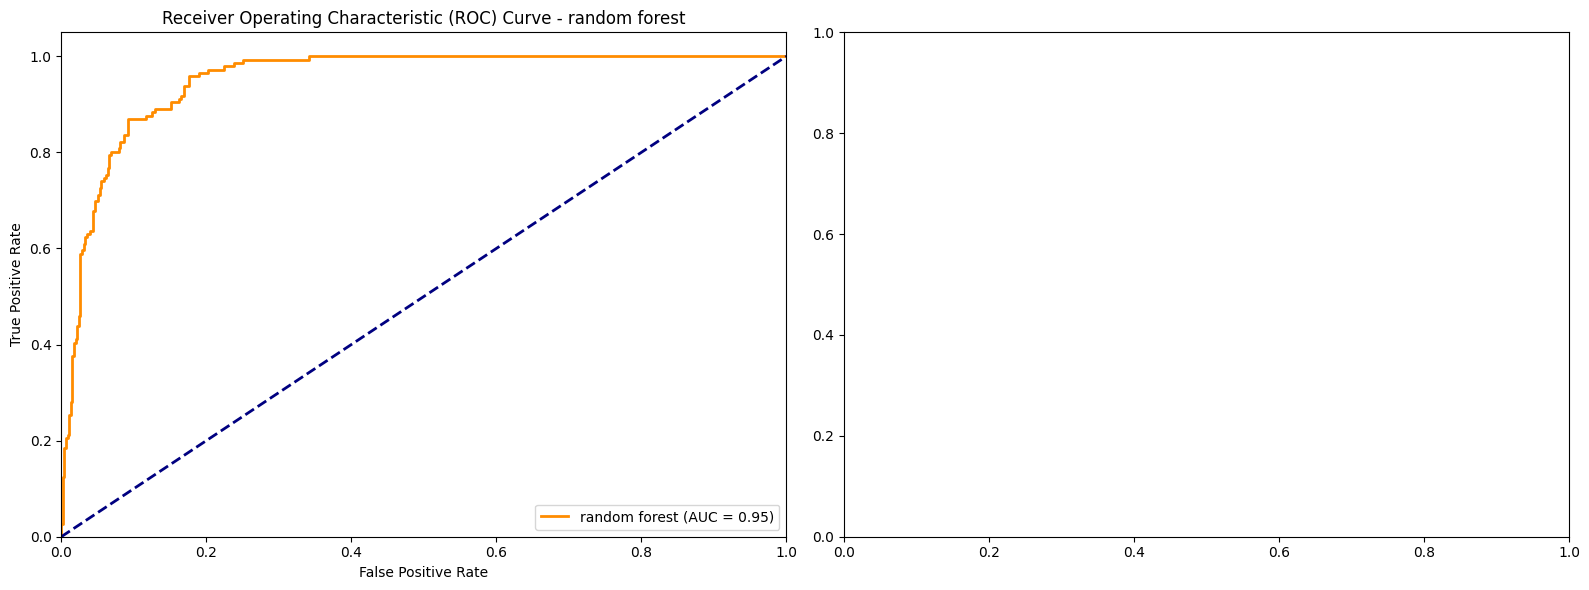

In [47]:
def plot_roc_curve(ax, y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba, pos_label=1)  # Ensure pos_label is correctly set
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    ax.legend(loc="lower right")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot ROC curves on subplots
plot_roc_curve(axes[0], y_test1, best_clf.predict_proba(X_test1)[:, 1], 'random forest')


plt.tight_layout()
plt.show()

In [ ]:
X_train.shape[1]

20

**Try nn for classification**

In [48]:
import torch


In [49]:
def device_option():
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  return device

In [78]:
device = device_option()
device

device(type='cuda', index=0)

In [145]:
class PhoneNet(torch.nn.Module):
  def __init__(self, n_fc1, n_fc2, n_features) -> None:
    super().__init__()
    self.fc1 = torch.nn.Linear(n_features, n_fc1)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_fc1, n_fc2)

  def forward(self, x):
    x = self.fc1(x)
    #x = self.act1(x)
    #x = self.fc2(x)
    return x





In [146]:
net = PhoneNet(80,16,X_train.shape[1]).to(device)

In [147]:
optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
loss = torch.nn.CrossEntropyLoss()

In [129]:
tensor_X = torch.from_numpy(X_train).float()
tensor_X

tensor([[-0.7660,  1.0101, -1.1305,  ..., -0.7179,  0.5393,  0.8299],
        [-0.0945,  1.0101, -1.2531,  ..., -0.8106,  1.3069,  0.6867],
        [ 0.6385, -0.9900,  0.7082,  ..., -0.8848, -0.9960,  0.3873],
        ...,
        [ 1.3441,  1.0101, -1.2531,  ..., -0.8106,  0.5393,  1.2466],
        [ 1.5672, -0.9900, -0.7627,  ...,  0.0611, -0.2284,  1.2466],
        [-1.3738,  1.0101, -1.1305,  ..., -0.7179,  0.5393,  0.9862]])

In [130]:
tensor_X.shape

torch.Size([1400, 20])

In [131]:
y_train

,price_range
836,3
575,2
557,2
1235,0
1360,0
...,...
1130,3
1294,0
860,2
1459,3


In [132]:
tensor_y =  torch.from_numpy(y_train.to_numpy()).float()
tensor_y

tensor([3., 2., 2.,  ..., 2., 3., 1.])

In [133]:
tensor_y.shape

torch.Size([1400])

In [134]:
 torch.cuda.is_available()

True

In [135]:
tensor_y = tensor_y.type(torch.LongTensor)

In [136]:
tensor_y = tensor_y.to(device)
tensor_X = tensor_X.to(device)

In [137]:
tensor_X

tensor([[-0.7660,  1.0101, -1.1305,  ..., -0.7179,  0.5393,  0.8299],
        [-0.0945,  1.0101, -1.2531,  ..., -0.8106,  1.3069,  0.6867],
        [ 0.6385, -0.9900,  0.7082,  ..., -0.8848, -0.9960,  0.3873],
        ...,
        [ 1.3441,  1.0101, -1.2531,  ..., -0.8106,  0.5393,  1.2466],
        [ 1.5672, -0.9900, -0.7627,  ...,  0.0611, -0.2284,  1.2466],
        [-1.3738,  1.0101, -1.1305,  ..., -0.7179,  0.5393,  0.9862]],
       device='cuda:0')

In [138]:
tensor_y

tensor([3, 2, 2,  ..., 2, 3, 1], device='cuda:0')

In [139]:
tensor_y.shape

torch.Size([1400])

In [120]:
X_test1 = torch.from_numpy(X_test1).float().to(device)
y_test1 =  torch.from_numpy(y_test1.to_numpy()).to(device)

TypeError: expected np.ndarray (got Tensor)

In [148]:
batch_size = 50
acc_history = []
test_history = []
for epoch in range(500):
  order = np.random.permutation(tensor_X.shape[0])

  for st in range(0, tensor_X.shape[0], batch_size):
    optimizer.zero_grad()

    ind = order[st:st+batch_size]
    batched_x = tensor_X[ind].to(device)
    batched_y = tensor_y[ind].to(device)

    y_pred = net.forward(batched_x)
    loss_val = loss(y_pred, batched_y)
    loss_val.backward()
    optimizer.step()
  if epoch % 10 == 0:
    preds = net.forward(tensor_X).to(device)
    test_preds = net.forward(X_test1).to(device)
    acc_history.append(((preds.argmax(dim=1) == tensor_y).float().mean()).to('cpu'))
    test_history.append(((test_preds.argmax(dim=1) == y_test1).float().mean()).to('cpu'))
    print((preds.argmax(dim=1) == tensor_y).float().mean())



tensor(0.0464, device='cuda:0')
tensor(0.4629, device='cuda:0')
tensor(0.5393, device='cuda:0')
tensor(0.5843, device='cuda:0')
tensor(0.6100, device='cuda:0')
tensor(0.6321, device='cuda:0')
tensor(0.6564, device='cuda:0')
tensor(0.6807, device='cuda:0')
tensor(0.7050, device='cuda:0')
tensor(0.7336, device='cuda:0')
tensor(0.7743, device='cuda:0')
tensor(0.7957, device='cuda:0')
tensor(0.8136, device='cuda:0')
tensor(0.8364, device='cuda:0')
tensor(0.8529, device='cuda:0')
tensor(0.8700, device='cuda:0')
tensor(0.8793, device='cuda:0')
tensor(0.8886, device='cuda:0')
tensor(0.8957, device='cuda:0')
tensor(0.9007, device='cuda:0')
tensor(0.9057, device='cuda:0')
tensor(0.9064, device='cuda:0')
tensor(0.9100, device='cuda:0')
tensor(0.9143, device='cuda:0')
tensor(0.9236, device='cuda:0')
tensor(0.9279, device='cuda:0')
tensor(0.9286, device='cuda:0')
tensor(0.9293, device='cuda:0')
tensor(0.9307, device='cuda:0')
tensor(0.9336, device='cuda:0')
tensor(0.9357, device='cuda:0')
tensor(0

In [141]:
X_test1, y_test1

(tensor([[ 0.9276, -0.9900,  1.1985,  ..., -0.3470, -0.2284, -0.4200],
         [-0.1287, -0.9900, -1.2531,  ..., -0.5324, -0.9960,  3.1605],
         [ 1.6696, -0.9900,  1.6888,  ...,  2.4908, -0.9960, -0.9408],
         ...,
         [-1.5559,  1.0101, -1.2531,  ..., -0.8106,  0.5393,  2.4184],
         [-0.4337,  1.0101, -0.0273,  ..., -0.9961, -0.2284,  0.3873],
         [-0.4041,  1.0101,  0.7082,  ...,  1.4521,  0.5393,  1.4549]],
        device='cuda:0'),
 tensor([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2, 1, 2,
         0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0, 2, 3, 2, 1,
         3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0, 3, 3, 1, 2, 2, 2,
         0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3, 3, 0, 3, 3, 2, 1, 3, 2,
         2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1, 0, 0, 3, 1, 3, 2, 3, 2, 0, 2,
         1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0, 2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 3, 2,
         0, 0, 0, 1, 1, 2, 3, 1, 1, 0, 2, 2, 0,

In [161]:
preds = net.forward(X_test1)
print((preds.argmax(dim=1)==y_test1).float().mean())

tensor(0.9217, device='cuda:0')


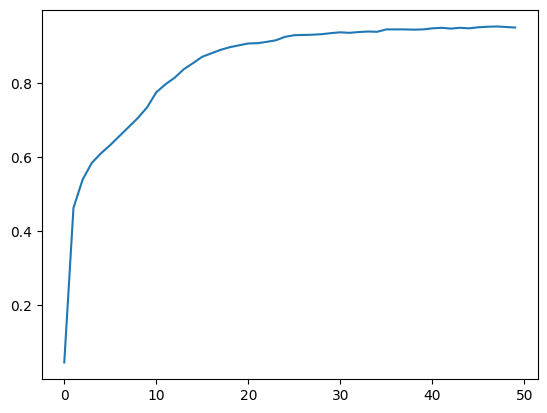

In [162]:
plt.plot(acc_history)
plt.show()

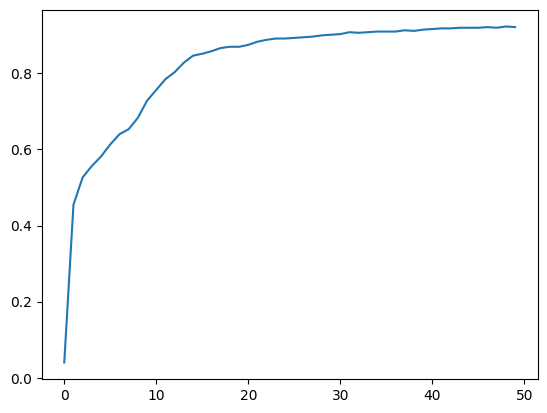

In [163]:
plt.plot(test_history)
plt.show()

In [164]:
preds = preds.argmax(dim=1)
pr = preds.cpu().detach().numpy()
y = y_test1.cpu().detach().numpy()

In [165]:
y

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [166]:
pr

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 3, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 2, 2, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 3, 1, 0, 0, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 2, 0, 0, 2, 1, 3, 0, 1, 2, 0, 1, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 0, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 0, 0, 1, 3, 3,

In [168]:
print(classification_report(y,pr))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       151
           1       0.88      0.92      0.90       146
           2       0.92      0.85      0.88       148
           3       0.93      0.96      0.94       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

